# Ford Gobike Data Exploration
## by Ricardo Cortes

## Table of Contents
- [Introduction](#Introduction)
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Univariate Exploration](#Univariate-Exploration)
- [Bivariate Exploration](#Bivariate-Exploration)
- [Multivariate Exploration](#Multivariate-Exploration)
- [Summary](#Summary)


<a id="Introduction"></a>
# Introduction
    Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

    The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

<a id="Preliminary-Wrangling"></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [3]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
239106,184,2019-04-01 00:09:17.5660,2019-04-01 00:12:22.5170,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,No
239107,539,2019-04-01 00:03:02.5730,2019-04-01 00:12:02.0670,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,Yes
239108,292,2019-04-01 00:06:04.2370,2019-04-01 00:10:56.9850,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,Yes
239109,471,2019-04-01 00:01:38.4110,2019-04-01 00:09:29.9650,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,Yes
239110,356,2019-04-01 00:00:28.7290,2019-04-01 00:06:25.0650,14.0,Clay St at Battery St,37.795001,-122.399970,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5956,Subscriber,No


In [4]:
df.shape

(239111, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  bike_share_for_all_trip  239111 non-null  object 
dtypes: f

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [7]:
df_clean = df.copy()

In [8]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [9]:
df_clean.bike_share_for_all_trip = (df_clean.bike_share_for_all_trip == 'Yes')

In [10]:
df_clean.user_type = df_clean.user_type.astype('category')

In [11]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [13]:
df_clean['start_time_wkday'] = df_clean.start_time.dt.strftime('%a')

In [14]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean.start_time.dt.hour
df_clean['end_time_hour'] = df_clean.end_time.dt.hour

In [15]:
# Duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean.duration_sec /60
df_clean['duration_min'] = df_clean.duration_min.astype(int)

In [16]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_month,start_time_wkday,start_time_hour,end_time_hour,duration_min
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,False,April,Tue,22,12,838
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,False,April,Tue,20,11,895
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,False,April,Tue,10,8,1301
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,False,April,Tue,10,7,1316
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,False,April,Tue,23,0,18


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             239111 non-null  int64         
 1   start_time               239111 non-null  datetime64[ns]
 2   end_time                 239111 non-null  datetime64[ns]
 3   start_station_id         239047 non-null  float64       
 4   start_station_name       239047 non-null  object        
 5   start_station_latitude   239111 non-null  float64       
 6   start_station_longitude  239111 non-null  float64       
 7   end_station_id           239047 non-null  float64       
 8   end_station_name         239047 non-null  object        
 9   end_station_latitude     239111 non-null  float64       
 10  end_station_longitude    239111 non-null  float64       
 11  bike_id                  239111 non-null  int64         
 12  user_type       

In [100]:
df_clean.to_csv('master_clean.csv', index= False)

### What is the structure of your dataset?

> There are 183,412 data trips for fordgobike in the dataset with 19 features. 11 variable are numeric, and others are 2 datetime, 5 object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> The most interesting feature are the station, start time and end time and it's relationship with the other features. This information can help with business decision like "What Station need to have the most bike available and at what days and time"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Station and the time are going to be the features that help support my investigations of interest.

In [23]:
#Helps have a better data-ink ration by reducing distracting 
base_color = sb.color_palette()[0]

## Univariate Exploration

> For this section I am going to use a histogram to see distribution of trips by seconds and minutes.

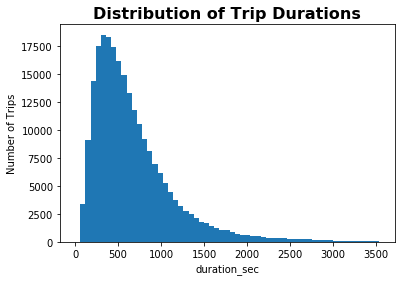

In [22]:
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges);
plt.title('Distribution of Trip Durations', fontsize=16, fontweight='bold')
plt.xlabel('duration_sec')
plt.ylabel('Number of Trips')
plt.show()

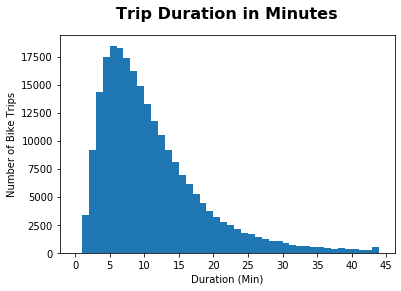

In [21]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

sb.distplot(df_clean['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});
plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

#### The Average trip is just under 13 minutes. Looking at the histogram, most rides are between 3 to 11 minutes. This suggest that the majority of user using the bikes for short distances or period of times.

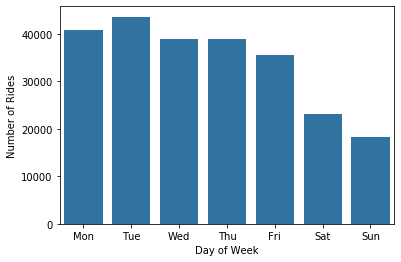

In [32]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df_clean, x='start_time_wkday', color=base_color, order= weekday);
plt.xlabel('Day of Week');
plt.ylabel('Number of Rides');

#### Tuesdays and Mondays seem to be the most popular days of the week for using the bike sharing system, however Wednesday, Thursday and Friday are also fairly popular. We can see a usage decrease on weekends suggesting that the bike systems is used mainly for communting during the regular working days.

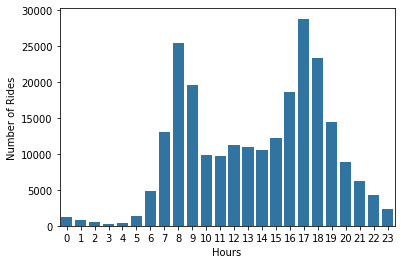

In [38]:
sb.countplot(data=df_clean, x='start_time_hour', color=base_color);
plt.xlabel('Hours');
plt.ylabel('Number of Rides');

#### We can see the chart displays a bimodial distribution with the peak 8-9am and 5-6. That is a the normal schedule in the United State for going in to work and leaving.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did do some feature engineering in order to displays the most popular day, hour and minutes in a chart since is was only given in a single format. They were a few outlier in the trip_duration variable were suppossedly some rode a bike for 23hours straight. In terms of time the distribution was mainly right-skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>No distribution seem out of the ordinary. Right now I was able to deduce that the primary user of the bike sharing system is the people from the working age range.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data.

In [40]:
#Making preparations to present the data in a donut chart
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

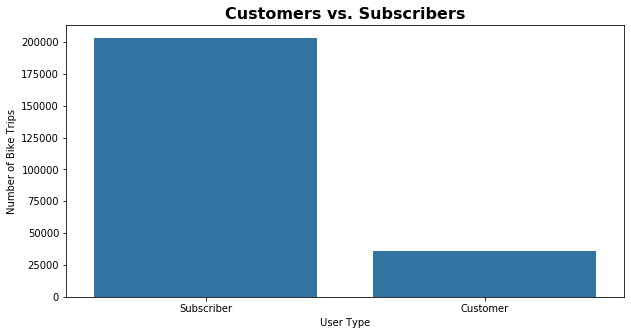

In [57]:
# bar chart
plt.figure(figsize = [10, 5])

sb.countplot(data = df_clean, x = "user_type", order = df_clean.user_type.value_counts().index, color=base_color);
plt.xlabel('User Type');
plt.ylabel('Number of Bike Trips');
plt.title('Customers vs. Subscribers', fontsize=16, fontweight='bold');

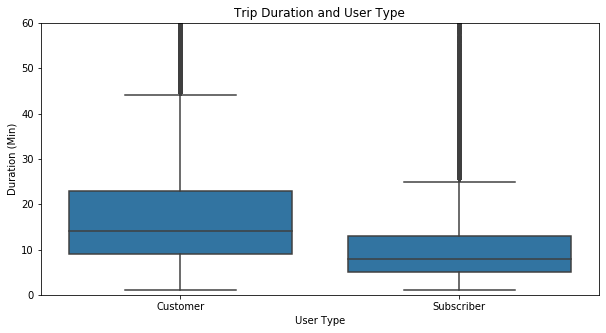

In [51]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (Min)')
plt.show()

#### Interestingly, we can see that higher percentage of customer rides longer trips then subscriber although number of subscriber riders are very high then customer.

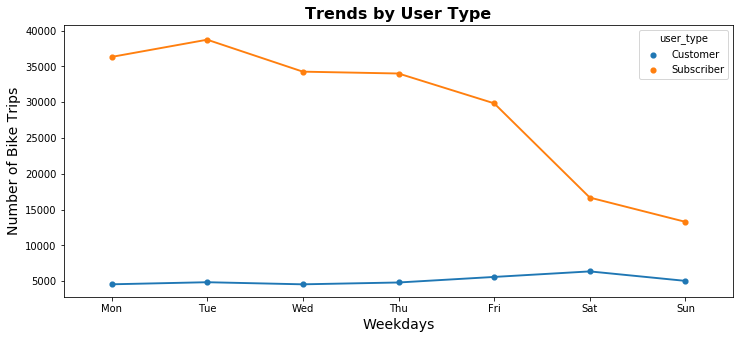

In [65]:
plt.figure(figsize=(12, 5))

df_clean_user_week = df_clean.groupby(['start_time_wkday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_clean_user_week, x='start_time_wkday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trends by User Type', fontsize=16, fontweight='bold')
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Number of Bike Trips', fontsize=14);

#### The point plot above help us visualize how customer usage differes from subscribers. We can see that subscribers have a decline in usage in the weekends, however with customers we can see a small spike in usage specially on Saturdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We were able to observe how subscriber are mainly commuters that are mostly going to use the system to go to work or school and the mostly rent bikes around normal 9 to 5 schedules

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that even tho there are more subscriber than customers, customer ride duration last longer than does from subscriber.

## Multivariate Exploration


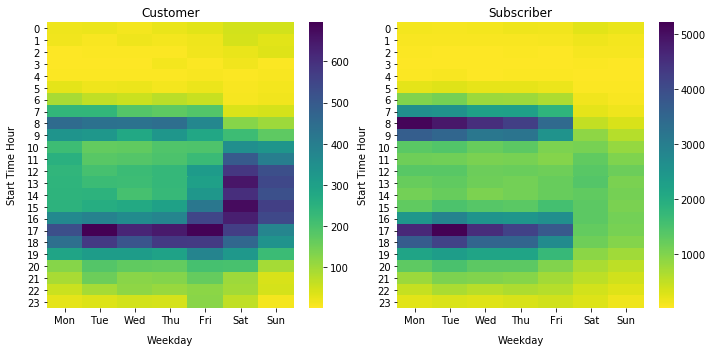

In [99]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['start_time_wkday'] = pd.Categorical(df_clean.start_time_wkday, categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[10,5])

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_wkday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_wkday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'viridis_r')

plt.title('Customer')
plt.xlabel('Weekday', labelpad = 10)
plt.ylabel('Start Time Hour',  labelpad = 10)
plt.tight_layout()

           
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_wkday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

# Heatmap - subscriber
plt.subplot(1, 2, 2)
df_sub = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_wkday'])['bike_id'].size().reset_index();
df_sub = df_sub.pivot('start_time_hour', 'start_time_wkday', 'bike_id')

heat_map = sb.heatmap(df_sub, cmap = 'viridis_r')

plt.title('Subscriber')
plt.xlabel('Weekday', labelpad = 10)
plt.ylabel('Start Time Hour',  labelpad = 10)
plt.tight_layout()
plt.show()





> The heatmap failed to unveil novel insights regarding the temporal patterns of bike sharing system utilization among distinct user groups. As previously observed, there is a contrast in the usage patterns between Customers and Subscribers, with the former utilizing the system predominantly at times opposite to those favored by the latter.
